In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Training_set.csv")

In [3]:
data.isna().sum()

Phenotype                                                             0
PatientID                                                             0
TimePoint                                                             0
Pre0_GENERAL_>Uni>_3D_Inside                                          1
Pre0_GENERAL_>Perp>_3D_Inside                                         1
                                                                     ..
Pre0_GENERAL_>GLCM_IMC1>_Median_LevelNumber64_dist4_3D                2
Pre0_GENERAL_>GLCM_IMC2>_Median_LevelNumber64_dist4_3D                2
Pre0_GENERAL_>GLCM_MCC>_Median_LevelNumber64_dist4_3D                 2
Pre0_GENERAL_>GLCM_Max_Prob>_Median_LevelNumber64_dist4_3D            2
Pre0_GENERAL_>GLCM_Cluster_Tendency>_Median_LevelNumber64_dist4_3D    2
Length: 1163, dtype: int64

In [4]:
data = data.dropna()

In [5]:
for timepoint in [1, 4, 7]:
    subset = data[data["TimePoint"] == timepoint]
    print(f"Timepoint {timepoint}: {len(subset)} rows")

Timepoint 1: 108 rows
Timepoint 4: 110 rows
Timepoint 7: 111 rows


In [6]:
# Extract patient IDs for Timepoint 1
patient_ids_timepoint_1 = set(data[data['TimePoint'] == 1]['PatientID'])

# Filter data for Timepoint 4 and Timepoint 7 to include only patient IDs from Timepoint 1
data_timepoint_4 = data[(data['TimePoint'] == 4) & (data['PatientID'].isin(patient_ids_timepoint_1))]
data_timepoint_7 = data[(data['TimePoint'] == 7) & (data['PatientID'].isin(patient_ids_timepoint_1))]

In [7]:
data_timepoint_4 = data_timepoint_4.copy()
data_timepoint_7 = data_timepoint_7.copy()
data_timepoint_1 = data[data['TimePoint'] == 1].copy()

In [8]:
data_timepoint_4.head()

,Phenotype,PatientID,TimePoint,Pre0_GENERAL_>Uni>_3D_Inside,Pre0_GENERAL_>Perp>_3D_Inside,Pre0_GENERAL_>Bi>_3D_Inside,Pre0_GENERAL_>Area>_3D_Inside,Pre0_GENERAL_>Volume>_3D_Inside,Pre0_GENERAL_>Mass_3D>_3D_Inside,Pre0_GENERAL_>Mass_2D>_3D_Inside,...,Pre0_GENERAL_>GLCM_Sum_Variance>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_Sum_Entropy>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_Entropy>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_Diff_Variance>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_Diff_Entropy>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_IMC1>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_IMC2>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_MCC>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_Max_Prob>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_Cluster_Tendency>_Median_LevelNumber64_dist4_3D
1,HCC,FRANCE_TEMA_HCC001,4,23.478714,12.298374,288.750000,220.25,3133.500,5.505869e+05,35362.64381,...,3889.519035,3.384562,5.712211,0.036877,2.580413,-0.024955,0.366625,0.302473,0.013260,68.361507
4,HCC,FRANCE_TEMA_HCC002,4,93.768332,69.808667,6545.842240,3585.00,231990.875,4.920168e+07,767957.61000,...,5668.526178,3.260656,5.758261,0.034772,2.547497,-0.001255,0.084895,0.092109,0.009147,39.897273
7,HCC,FRANCE_TEMA_HCC003,4,23.926972,21.242646,508.272196,365.50,1616.625,3.207983e+05,69370.25417,...,5028.575191,3.475294,6.157637,0.030218,2.784775,-0.015999,0.307798,0.120985,0.006615,61.674046
10,HCC,FRANCE_TEMA_HCC008,4,21.965883,14.807093,325.250865,231.50,3096.625,6.618892e+05,48527.61623,...,5895.995522,3.119863,5.164359,0.043874,2.147505,-0.031362,0.390206,0.376075,0.017952,30.416591
13,HCC,FRANCE_TEMA_HCC012,4,65.149827,58.354520,3801.786899,2843.25,85060.625,1.531443e+07,506396.73770,...,4059.560434,3.185820,5.637525,0.035699,2.500771,-0.000704,0.062952,0.050371,0.010071,34.311376


In [9]:
delta_columns = data.select_dtypes(include=float).columns

In [10]:
delta_columns

Index(['Pre0_GENERAL_>Uni>_3D_Inside', 'Pre0_GENERAL_>Perp>_3D_Inside',
       'Pre0_GENERAL_>Bi>_3D_Inside', 'Pre0_GENERAL_>Area>_3D_Inside',
       'Pre0_GENERAL_>Volume>_3D_Inside', 'Pre0_GENERAL_>Mass_3D>_3D_Inside',
       'Pre0_GENERAL_>Mass_2D>_3D_Inside',
       'Pre0_GENERAL_>Intensity_Mean>_bins64_max225_min-125_MaxDiameter_2D',
       'Pre0_GENERAL_>Intensity_Std>_bins64_max225_min-125_MaxDiameter_2D',
       'Pre0_GENERAL_>Intensity_Skewness>_bins64_max225_min-125_MaxDiameter_2D',
       ...
       'Pre0_GENERAL_>GLCM_Sum_Variance>_Median_LevelNumber64_dist4_3D',
       'Pre0_GENERAL_>GLCM_Sum_Entropy>_Median_LevelNumber64_dist4_3D',
       'Pre0_GENERAL_>GLCM_Entropy>_Median_LevelNumber64_dist4_3D',
       'Pre0_GENERAL_>GLCM_Diff_Variance>_Median_LevelNumber64_dist4_3D',
       'Pre0_GENERAL_>GLCM_Diff_Entropy>_Median_LevelNumber64_dist4_3D',
       'Pre0_GENERAL_>GLCM_IMC1>_Median_LevelNumber64_dist4_3D',
       'Pre0_GENERAL_>GLCM_IMC2>_Median_LevelNumber64_dist4_3D',
 

In [11]:
delta_dataframes = []

# Calculate the delta features
for column in delta_columns:
    delta_41 = data_timepoint_4[column] - data_timepoint_1[column]
    delta_74 = data_timepoint_7[column] - data_timepoint_4[column]
    delta_71 = data_timepoint_7[column] - data_timepoint_1[column]

    delta_df = pd.concat([delta_41, delta_74, delta_71], axis=1)
    delta_df.columns = [f"4-1 Delta of {column}", f"7-4 Delta of {column}", f"7-1 Delta of {column}"]

    delta_dataframes.append(delta_df)

all_delta_features = pd.concat(delta_dataframes, axis=1)


In [12]:
# Check for missing values
missing_values_timepoint_1 = data_timepoint_1['PatientID'].isnull().any()
missing_values_timepoint_4 = data_timepoint_4['PatientID'].isnull().any()
missing_values_timepoint_7 = data_timepoint_7['PatientID'].isnull().any()

# Check for duplicate unique identifiers
duplicates_timepoint_1 = data_timepoint_1['PatientID'].duplicated().any()
duplicates_timepoint_4 = data_timepoint_4['PatientID'].duplicated().any()
duplicates_timepoint_7 = data_timepoint_7['PatientID'].duplicated().any()

# Check for unique identifiers
unique_identifiers_timepoint_1 = data_timepoint_1['PatientID'].is_unique
unique_identifiers_timepoint_4 = data_timepoint_4['PatientID'].is_unique
unique_identifiers_timepoint_7 = data_timepoint_7['PatientID'].is_unique

# Check for data range
min_identifier_timepoint_1 = data_timepoint_1['PatientID'].min()
max_identifier_timepoint_1 = data_timepoint_1['PatientID'].max()

min_identifier_timepoint_4 = data_timepoint_4['PatientID'].min()
max_identifier_timepoint_4 = data_timepoint_4['PatientID'].max()

min_identifier_timepoint_7 = data_timepoint_7['PatientID'].min()
max_identifier_timepoint_7 = data_timepoint_7['PatientID'].max()

# Print the results
print("Missing Values:")
print("Timepoint 1:", missing_values_timepoint_1)
print("Timepoint 4:", missing_values_timepoint_4)
print("Timepoint 7:", missing_values_timepoint_7)

print("Duplicate Identifiers:")
print("Timepoint 1:", duplicates_timepoint_1)
print("Timepoint 4:", duplicates_timepoint_4)
print("Timepoint 7:", duplicates_timepoint_7)

print("Unique Identifiers:")
print("Timepoint 1:", unique_identifiers_timepoint_1)
print("Timepoint 4:", unique_identifiers_timepoint_4)
print("Timepoint 7:", unique_identifiers_timepoint_7)

print("Data Range:")
print("Timepoint 1 - Min:", min_identifier_timepoint_1, "Max:", max_identifier_timepoint_1)
print("Timepoint 4 - Min:", min_identifier_timepoint_4, "Max:", max_identifier_timepoint_4)
print("Timepoint 7 - Min:", min_identifier_timepoint_7, "Max:", max_identifier_timepoint_7)

Missing Values:
Timepoint 1: False
Timepoint 4: False
Timepoint 7: False
Duplicate Identifiers:
Timepoint 1: True
Timepoint 4: True
Timepoint 7: True
Unique Identifiers:
Timepoint 1: False
Timepoint 4: False
Timepoint 7: False
Data Range:
Timepoint 1 - Min: FRANCE_TEMA_HCC001 Max: FRANCE_TEMA_NHCC009
Timepoint 4 - Min: FRANCE_TEMA_HCC001 Max: FRANCE_TEMA_NHCC009
Timepoint 7 - Min: FRANCE_TEMA_HCC001 Max: FRANCE_TEMA_NHCC009


In [13]:
# Identify duplicate Patient IDs in a specific timepoint
duplicates_timepoint_1 = data_timepoint_1[data_timepoint_1['PatientID'].duplicated(keep=False)]

print("Duplicate Rows in Timepoint 1:")
print(duplicates_timepoint_1)

Duplicate Rows in Timepoint 1:
    Phenotype            PatientID  TimePoint  Pre0_GENERAL_>Uni>_3D_Inside  \
314    Benign  FRANCE_TEMA_NHCC005          1                     26.800187   
315    Benign  FRANCE_TEMA_NHCC005          1                     26.800187   

     Pre0_GENERAL_>Perp>_3D_Inside  Pre0_GENERAL_>Bi>_3D_Inside  \
314                      21.400935                   573.549039   
315                      21.400935                   573.549039   

     Pre0_GENERAL_>Area>_3D_Inside  Pre0_GENERAL_>Volume>_3D_Inside  \
314                          402.5                         2919.625   
315                          402.5                         2919.625   

     Pre0_GENERAL_>Mass_3D>_3D_Inside  Pre0_GENERAL_>Mass_2D>_3D_Inside  ...  \
314                       473703.7302                       65959.50935  ...   
315                       473703.7302                       65959.50935  ...   

     Pre0_GENERAL_>GLCM_Sum_Variance>_Median_LevelNumber64_dist4_3D  \
314

In [14]:
# Drop duplicates
data_timepoint_1 = data_timepoint_1.drop_duplicates(subset='PatientID', keep='first')
data_timepoint_1.reset_index(drop=True, inplace=True)

In [15]:
data_timepoint_4 = data_timepoint_4.drop_duplicates(subset='PatientID', keep='first')
data_timepoint_4.reset_index(drop=True, inplace=True)

data_timepoint_7 = data_timepoint_7.drop_duplicates(subset='PatientID', keep='first')
data_timepoint_7.reset_index(drop=True, inplace=True)

In [16]:
for column in delta_columns:
    data_timepoint_4[f"4-1 Delta of {column}"] = data_timepoint_4[column] - data_timepoint_1[column]
    data_timepoint_7[f"7-4 Delta of {column}"] = data_timepoint_7[column] - data_timepoint_4[column]
    data_timepoint_7[f"7-1 Delta of {column}"] = data_timepoint_7[column] - data_timepoint_1[column]

C:\Users\abc\AppData\Local\Temp\ipykernel_12572\164739539.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_timepoint_7[f"7-1 Delta of {column}"] = data_timepoint_7[column] - data_timepoint_1[column]
C:\Users\abc\AppData\Local\Temp\ipykernel_12572\164739539.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_timepoint_7[f"7-4 Delta of {column}"] = data_timepoint_7[column] - data_timepoint_4[column]
C:\Users\abc\AppData\Local\Temp\ipykernel_12572\164739539.py:4: PerformanceWarning: DataFrame is highly fragmented.  Thi

In [17]:
data_timepoint_1['Category'] = data_timepoint_1['Phenotype'].apply(lambda x: 'HCC' if x == 'HCC' else 'NonHCC')
data_timepoint_1 = data_timepoint_1.drop('Phenotype', axis=1)

data_timepoint_1.head()

,PatientID,TimePoint,Pre0_GENERAL_>Uni>_3D_Inside,Pre0_GENERAL_>Perp>_3D_Inside,Pre0_GENERAL_>Bi>_3D_Inside,Pre0_GENERAL_>Area>_3D_Inside,Pre0_GENERAL_>Volume>_3D_Inside,Pre0_GENERAL_>Mass_3D>_3D_Inside,Pre0_GENERAL_>Mass_2D>_3D_Inside,Pre0_GENERAL_>Intensity_Mean>_bins64_max225_min-125_MaxDiameter_2D,...,Pre0_GENERAL_>GLCM_Sum_Entropy>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_Entropy>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_Diff_Variance>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_Diff_Entropy>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_IMC1>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_IMC2>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_MCC>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_Max_Prob>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_Cluster_Tendency>_Median_LevelNumber64_dist4_3D,Category
0,FRANCE_TEMA_HCC001,1,27.901613,15.00000,418.524193,317.50,2949.125,4.870570e+05,49581.27458,31.161495,...,3.310927,5.597638,0.037269,2.593155,-0.023409,0.352381,0.256058,0.018246,74.467388,HCC
1,FRANCE_TEMA_HCC002,1,79.071170,63.83181,5047.255950,3544.25,209135.000,3.599752e+07,610968.30780,47.382961,...,3.422891,6.148704,0.030389,2.764661,-0.000195,0.034659,0.022939,0.006113,55.059424,HCC
2,FRANCE_TEMA_HCC003,1,27.681221,15.66046,433.500649,258.00,4967.125,8.245318e+05,42207.81471,38.596181,...,2.660963,4.542582,0.047782,1.989078,-0.004712,0.145690,0.098299,0.031709,12.052142,HCC
3,FRANCE_TEMA_HCC008,1,17.557050,11.70470,205.500000,162.25,2358.000,4.094421e+05,27812.66082,46.418557,...,2.791607,4.667566,0.047608,2.038994,-0.017887,0.283975,0.261158,0.033355,16.894040,HCC
4,FRANCE_TEMA_HCC012,1,67.201190,59.70134,4012.001122,2804.50,88839.625,1.484096e+07,465492.11140,40.980428,...,3.119790,5.513212,0.036827,2.448062,-0.000703,0.062196,0.062511,0.011688,30.124144,HCC


In [18]:
data_timepoint_4['Category'] = data_timepoint_4['Phenotype'].apply(lambda x: 'HCC' if x == 'HCC' else 'NonHCC')
data_timepoint_4 = data_timepoint_4.drop('Phenotype', axis=1)

data_timepoint_4.head()

C:\Users\abc\AppData\Local\Temp\ipykernel_12572\2403880638.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_timepoint_4['Category'] = data_timepoint_4['Phenotype'].apply(lambda x: 'HCC' if x == 'HCC' else 'NonHCC')


,PatientID,TimePoint,Pre0_GENERAL_>Uni>_3D_Inside,Pre0_GENERAL_>Perp>_3D_Inside,Pre0_GENERAL_>Bi>_3D_Inside,Pre0_GENERAL_>Area>_3D_Inside,Pre0_GENERAL_>Volume>_3D_Inside,Pre0_GENERAL_>Mass_3D>_3D_Inside,Pre0_GENERAL_>Mass_2D>_3D_Inside,Pre0_GENERAL_>Intensity_Mean>_bins64_max225_min-125_MaxDiameter_2D,...,4-1 Delta of Pre0_GENERAL_>GLCM_Sum_Entropy>_Median_LevelNumber64_dist4_3D,4-1 Delta of Pre0_GENERAL_>GLCM_Entropy>_Median_LevelNumber64_dist4_3D,4-1 Delta of Pre0_GENERAL_>GLCM_Diff_Variance>_Median_LevelNumber64_dist4_3D,4-1 Delta of Pre0_GENERAL_>GLCM_Diff_Entropy>_Median_LevelNumber64_dist4_3D,4-1 Delta of Pre0_GENERAL_>GLCM_IMC1>_Median_LevelNumber64_dist4_3D,4-1 Delta of Pre0_GENERAL_>GLCM_IMC2>_Median_LevelNumber64_dist4_3D,4-1 Delta of Pre0_GENERAL_>GLCM_MCC>_Median_LevelNumber64_dist4_3D,4-1 Delta of Pre0_GENERAL_>GLCM_Max_Prob>_Median_LevelNumber64_dist4_3D,4-1 Delta of Pre0_GENERAL_>GLCM_Cluster_Tendency>_Median_LevelNumber64_dist4_3D,Category
0,FRANCE_TEMA_HCC001,4,23.478714,12.298374,288.750000,220.25,3133.500,5.505869e+05,35362.64381,35.556839,...,0.073635,0.114573,-0.000392,-0.012742,-0.001546,0.014244,0.046415,-0.004986,-6.105881,HCC
1,FRANCE_TEMA_HCC002,4,93.768332,69.808667,6545.842240,3585.00,231990.875,4.920168e+07,767957.61000,89.214117,...,-0.162235,-0.390443,0.004383,-0.217164,-0.001060,0.050236,0.069170,0.003034,-15.162151,HCC
2,FRANCE_TEMA_HCC003,4,23.926972,21.242646,508.272196,365.50,1616.625,3.207983e+05,69370.25417,64.795497,...,0.814331,1.615055,-0.017564,0.795697,-0.011287,0.162108,0.022686,-0.025094,49.621904,HCC
3,FRANCE_TEMA_HCC008,4,21.965883,14.807093,325.250865,231.50,3096.625,6.618892e+05,48527.61623,84.622532,...,0.328256,0.496793,-0.003734,0.108511,-0.013475,0.106231,0.114917,-0.015403,13.522551,HCC
4,FRANCE_TEMA_HCC012,4,65.149827,58.354520,3801.786899,2843.25,85060.625,1.531443e+07,506396.73770,53.104893,...,0.066030,0.124313,-0.001128,0.052709,-0.000001,0.000756,-0.012140,-0.001617,4.187232,HCC


In [19]:
data_timepoint_7['Category'] = data_timepoint_7['Phenotype'].apply(lambda x: 'HCC' if x == 'HCC' else 'NonHCC')
data_timepoint_7 = data_timepoint_7.drop('Phenotype', axis=1)

data_timepoint_7.head()

C:\Users\abc\AppData\Local\Temp\ipykernel_12572\495417271.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_timepoint_7['Category'] = data_timepoint_7['Phenotype'].apply(lambda x: 'HCC' if x == 'HCC' else 'NonHCC')


,PatientID,TimePoint,Pre0_GENERAL_>Uni>_3D_Inside,Pre0_GENERAL_>Perp>_3D_Inside,Pre0_GENERAL_>Bi>_3D_Inside,Pre0_GENERAL_>Area>_3D_Inside,Pre0_GENERAL_>Volume>_3D_Inside,Pre0_GENERAL_>Mass_3D>_3D_Inside,Pre0_GENERAL_>Mass_2D>_3D_Inside,Pre0_GENERAL_>Intensity_Mean>_bins64_max225_min-125_MaxDiameter_2D,...,7-1 Delta of Pre0_GENERAL_>GLCM_IMC1>_Median_LevelNumber64_dist4_3D,7-4 Delta of Pre0_GENERAL_>GLCM_IMC2>_Median_LevelNumber64_dist4_3D,7-1 Delta of Pre0_GENERAL_>GLCM_IMC2>_Median_LevelNumber64_dist4_3D,7-4 Delta of Pre0_GENERAL_>GLCM_MCC>_Median_LevelNumber64_dist4_3D,7-1 Delta of Pre0_GENERAL_>GLCM_MCC>_Median_LevelNumber64_dist4_3D,7-4 Delta of Pre0_GENERAL_>GLCM_Max_Prob>_Median_LevelNumber64_dist4_3D,7-1 Delta of Pre0_GENERAL_>GLCM_Max_Prob>_Median_LevelNumber64_dist4_3D,7-4 Delta of Pre0_GENERAL_>GLCM_Cluster_Tendency>_Median_LevelNumber64_dist4_3D,7-1 Delta of Pre0_GENERAL_>GLCM_Cluster_Tendency>_Median_LevelNumber64_dist4_3D,Category
0,FRANCE_TEMA_HCC001,7,29.774150,17.029386,507.035502,394.25,4356.875,8.656745e+05,76851.42731,69.930697,...,-0.010736,0.065463,0.079707,0.071698,0.118113,-0.004267,-0.009253,1.822017,-4.283864,HCC
1,FRANCE_TEMA_HCC002,7,81.266537,69.758512,5669.032683,3770.00,212275.375,4.035205e+07,716008.02350,64.922553,...,-0.000623,-0.016933,0.033303,-0.016331,0.052839,0.001110,0.004144,-4.766481,-19.928632,HCC
2,FRANCE_TEMA_HCC003,7,23.264780,21.029741,489.252299,298.50,2060.375,4.090292e+05,60075.18341,76.256896,...,-0.003281,-0.098893,0.063215,-0.026179,-0.003493,0.004017,-0.021077,-30.157644,19.464260,HCC
3,FRANCE_TEMA_HCC008,7,23.162470,12.980755,300.666343,211.25,3650.625,8.666583e+05,50086.33832,112.095093,...,0.005460,-0.146486,-0.040255,-0.150111,-0.035194,0.005135,-0.010268,-10.072956,3.449595,HCC
4,FRANCE_TEMA_HCC012,7,60.632087,50.328918,3051.547353,2105.50,52644.250,9.885544e+06,391003.39220,60.705719,...,-0.000621,0.023898,0.024654,0.030882,0.018742,-0.000397,-0.002014,3.493244,7.680476,HCC


In [20]:
# Merge data
merged_data = data_timepoint_1.merge(data_timepoint_4, on='PatientID', suffixes=('_1', '_4'), how='inner')

merged_data = merged_data.merge(data_timepoint_7, on='PatientID', suffixes=('', '_7'), how='inner')

merged_data.head()

,PatientID,TimePoint_1,Pre0_GENERAL_>Uni>_3D_Inside_1,Pre0_GENERAL_>Perp>_3D_Inside_1,Pre0_GENERAL_>Bi>_3D_Inside_1,Pre0_GENERAL_>Area>_3D_Inside_1,Pre0_GENERAL_>Volume>_3D_Inside_1,Pre0_GENERAL_>Mass_3D>_3D_Inside_1,Pre0_GENERAL_>Mass_2D>_3D_Inside_1,Pre0_GENERAL_>Intensity_Mean>_bins64_max225_min-125_MaxDiameter_2D_1,...,7-1 Delta of Pre0_GENERAL_>GLCM_IMC1>_Median_LevelNumber64_dist4_3D,7-4 Delta of Pre0_GENERAL_>GLCM_IMC2>_Median_LevelNumber64_dist4_3D,7-1 Delta of Pre0_GENERAL_>GLCM_IMC2>_Median_LevelNumber64_dist4_3D,7-4 Delta of Pre0_GENERAL_>GLCM_MCC>_Median_LevelNumber64_dist4_3D,7-1 Delta of Pre0_GENERAL_>GLCM_MCC>_Median_LevelNumber64_dist4_3D,7-4 Delta of Pre0_GENERAL_>GLCM_Max_Prob>_Median_LevelNumber64_dist4_3D,7-1 Delta of Pre0_GENERAL_>GLCM_Max_Prob>_Median_LevelNumber64_dist4_3D,7-4 Delta of Pre0_GENERAL_>GLCM_Cluster_Tendency>_Median_LevelNumber64_dist4_3D,7-1 Delta of Pre0_GENERAL_>GLCM_Cluster_Tendency>_Median_LevelNumber64_dist4_3D,Category
0,FRANCE_TEMA_HCC001,1,27.901613,15.00000,418.524193,317.50,2949.125,4.870570e+05,49581.27458,31.161495,...,-0.010736,0.065463,0.079707,0.071698,0.118113,-0.004267,-0.009253,1.822017,-4.283864,HCC
1,FRANCE_TEMA_HCC002,1,79.071170,63.83181,5047.255950,3544.25,209135.000,3.599752e+07,610968.30780,47.382961,...,-0.000623,-0.016933,0.033303,-0.016331,0.052839,0.001110,0.004144,-4.766481,-19.928632,HCC
2,FRANCE_TEMA_HCC003,1,27.681221,15.66046,433.500649,258.00,4967.125,8.245318e+05,42207.81471,38.596181,...,-0.003281,-0.098893,0.063215,-0.026179,-0.003493,0.004017,-0.021077,-30.157644,19.464260,HCC
3,FRANCE_TEMA_HCC008,1,17.557050,11.70470,205.500000,162.25,2358.000,4.094421e+05,27812.66082,46.418557,...,0.005460,-0.146486,-0.040255,-0.150111,-0.035194,0.005135,-0.010268,-10.072956,3.449595,HCC
4,FRANCE_TEMA_HCC012,1,67.201190,59.70134,4012.001122,2804.50,88839.625,1.484096e+07,465492.11140,40.980428,...,-0.000621,0.023898,0.024654,0.030882,0.018742,-0.000397,-0.002014,3.493244,7.680476,HCC


In [21]:
merged_data.isna().sum()

PatientID                                                                          0
TimePoint_1                                                                        0
Pre0_GENERAL_>Uni>_3D_Inside_1                                                     0
Pre0_GENERAL_>Perp>_3D_Inside_1                                                    0
Pre0_GENERAL_>Bi>_3D_Inside_1                                                      0
                                                                                  ..
7-4 Delta of Pre0_GENERAL_>GLCM_Max_Prob>_Median_LevelNumber64_dist4_3D            1
7-1 Delta of Pre0_GENERAL_>GLCM_Max_Prob>_Median_LevelNumber64_dist4_3D            0
7-4 Delta of Pre0_GENERAL_>GLCM_Cluster_Tendency>_Median_LevelNumber64_dist4_3D    1
7-1 Delta of Pre0_GENERAL_>GLCM_Cluster_Tendency>_Median_LevelNumber64_dist4_3D    0
Category                                                                           0
Length: 6967, dtype: int64

In [22]:
merged_data = merged_data.dropna()

In [23]:
merged_data

,PatientID,TimePoint_1,Pre0_GENERAL_>Uni>_3D_Inside_1,Pre0_GENERAL_>Perp>_3D_Inside_1,Pre0_GENERAL_>Bi>_3D_Inside_1,Pre0_GENERAL_>Area>_3D_Inside_1,Pre0_GENERAL_>Volume>_3D_Inside_1,Pre0_GENERAL_>Mass_3D>_3D_Inside_1,Pre0_GENERAL_>Mass_2D>_3D_Inside_1,Pre0_GENERAL_>Intensity_Mean>_bins64_max225_min-125_MaxDiameter_2D_1,...,7-1 Delta of Pre0_GENERAL_>GLCM_IMC1>_Median_LevelNumber64_dist4_3D,7-4 Delta of Pre0_GENERAL_>GLCM_IMC2>_Median_LevelNumber64_dist4_3D,7-1 Delta of Pre0_GENERAL_>GLCM_IMC2>_Median_LevelNumber64_dist4_3D,7-4 Delta of Pre0_GENERAL_>GLCM_MCC>_Median_LevelNumber64_dist4_3D,7-1 Delta of Pre0_GENERAL_>GLCM_MCC>_Median_LevelNumber64_dist4_3D,7-4 Delta of Pre0_GENERAL_>GLCM_Max_Prob>_Median_LevelNumber64_dist4_3D,7-1 Delta of Pre0_GENERAL_>GLCM_Max_Prob>_Median_LevelNumber64_dist4_3D,7-4 Delta of Pre0_GENERAL_>GLCM_Cluster_Tendency>_Median_LevelNumber64_dist4_3D,7-1 Delta of Pre0_GENERAL_>GLCM_Cluster_Tendency>_Median_LevelNumber64_dist4_3D,Category
0,FRANCE_TEMA_HCC001,1,27.901613,15.000000,418.524193,317.50,2949.125,4.870570e+05,49581.27458,31.161495,...,-0.010736,0.065463,0.079707,0.071698,0.118113,-0.004267,-0.009253,1.822017,-4.283864,HCC
1,FRANCE_TEMA_HCC002,1,79.071170,63.831810,5047.255950,3544.25,209135.000,3.599752e+07,610968.30780,47.382961,...,-0.000623,-0.016933,0.033303,-0.016331,0.052839,0.001110,0.004144,-4.766481,-19.928632,HCC
2,FRANCE_TEMA_HCC003,1,27.681221,15.660460,433.500649,258.00,4967.125,8.245318e+05,42207.81471,38.596181,...,-0.003281,-0.098893,0.063215,-0.026179,-0.003493,0.004017,-0.021077,-30.157644,19.464260,HCC
3,FRANCE_TEMA_HCC008,1,17.557050,11.704700,205.500000,162.25,2358.000,4.094421e+05,27812.66082,46.418557,...,0.005460,-0.146486,-0.040255,-0.150111,-0.035194,0.005135,-0.010268,-10.072956,3.449595,HCC
4,FRANCE_TEMA_HCC012,1,67.201190,59.701340,4012.001122,2804.50,88839.625,1.484096e+07,465492.11140,40.980428,...,-0.000621,0.023898,0.024654,0.030882,0.018742,-0.000397,-0.002014,3.493244,7.680476,HCC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,FRANCE_TEMA_NHCC004,1,16.560495,15.443445,255.751100,190.75,1674.500,2.737613e+05,31827.06148,41.852223,...,0.004782,-0.011102,-0.068891,-0.001522,-0.061245,0.014720,0.001613,-35.143822,0.220871,NonHCC
101,FRANCE_TEMA_NHCC005,1,26.800187,21.400935,573.549039,402.50,2919.625,4.737037e+05,65959.50935,38.874557,...,0.001651,0.037283,-0.023491,0.077954,0.059632,-0.005875,-0.000418,33.045117,7.871740,NonHCC
102,FRANCE_TEMA_NHCC006,1,23.769729,19.525624,464.118789,328.00,3315.500,5.379087e+05,53783.96749,38.975511,...,-0.001157,0.040444,0.028496,0.033200,0.003995,-0.006588,-0.006376,23.167382,22.112031,NonHCC
103,FRANCE_TEMA_NHCC007,1,23.600847,20.402206,481.509346,365.00,2925.625,5.108344e+05,61999.48734,44.861609,...,0.000033,-0.177927,0.003395,-0.218369,-0.014027,0.002297,-0.005490,-12.551926,4.768889,NonHCC


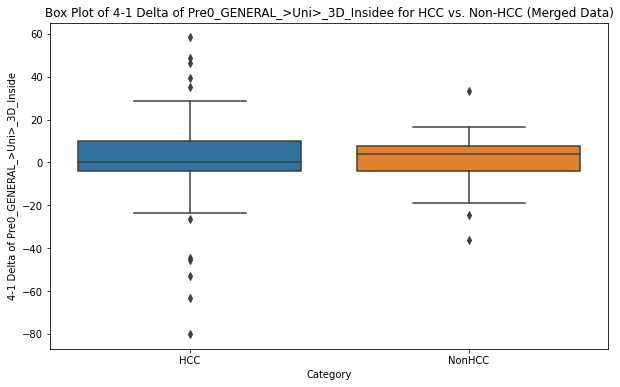

In [24]:
# Example: 
# Boxplot'4-1 Delta of Pre0_GENERAL_>Uni>_3D_Inside'

plt.figure(figsize=(10, 6))

sns.boxplot(x='Category', y='4-1 Delta of Pre0_GENERAL_>Uni>_3D_Inside', data=merged_data)

plt.title('Box Plot of 4-1 Delta of Pre0_GENERAL_>Uni>_3D_Insidee for HCC vs. Non-HCC (Merged Data)')
plt.xlabel('Category')
plt.ylabel('4-1 Delta of Pre0_GENERAL_>Uni>_3D_Inside')

plt.show()

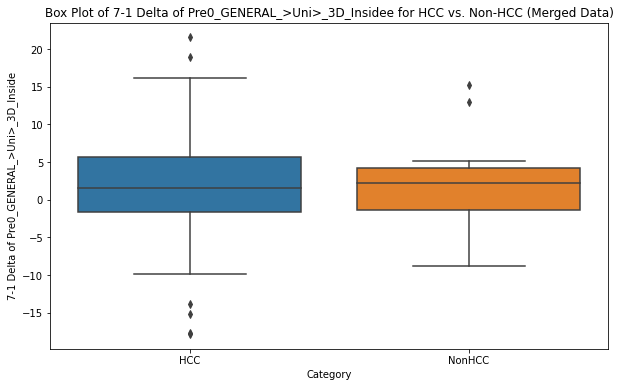

In [25]:
# Boxplot'7-1 Delta of Pre0_GENERAL_>Uni>_3D_Inside'

plt.figure(figsize=(10, 6))

sns.boxplot(x='Category', y='7-1 Delta of Pre0_GENERAL_>Uni>_3D_Inside', data=merged_data)

plt.title('Box Plot of 7-1 Delta of Pre0_GENERAL_>Uni>_3D_Insidee for HCC vs. Non-HCC (Merged Data)')
plt.xlabel('Category')
plt.ylabel('7-1 Delta of Pre0_GENERAL_>Uni>_3D_Inside')

plt.show()

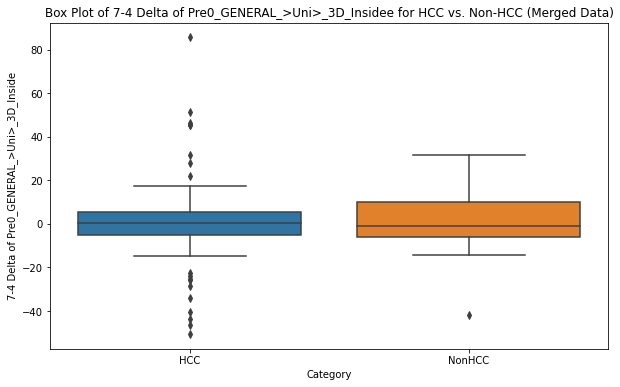

In [26]:
# Boxplot'7-4 Delta of Pre0_GENERAL_>Uni>_3D_Inside'

plt.figure(figsize=(10, 6))

sns.boxplot(x='Category', y='7-4 Delta of Pre0_GENERAL_>Uni>_3D_Inside', data=merged_data)

plt.title('Box Plot of 7-4 Delta of Pre0_GENERAL_>Uni>_3D_Insidee for HCC vs. Non-HCC (Merged Data)')
plt.xlabel('Category')
plt.ylabel('7-4 Delta of Pre0_GENERAL_>Uni>_3D_Inside')

plt.show()

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [28]:
portal_venous_phase= data[data['TimePoint'] == 7].copy()
portal_venous_phase['Category'] = portal_venous_phase['Phenotype'].apply(lambda x: 'HCC' if x == 'HCC' else 'NonHCC')
portal_venous_phase = portal_venous_phase.drop('Phenotype', axis=1)

portal_venous_phase.head()

,PatientID,TimePoint,Pre0_GENERAL_>Uni>_3D_Inside,Pre0_GENERAL_>Perp>_3D_Inside,Pre0_GENERAL_>Bi>_3D_Inside,Pre0_GENERAL_>Area>_3D_Inside,Pre0_GENERAL_>Volume>_3D_Inside,Pre0_GENERAL_>Mass_3D>_3D_Inside,Pre0_GENERAL_>Mass_2D>_3D_Inside,Pre0_GENERAL_>Intensity_Mean>_bins64_max225_min-125_MaxDiameter_2D,...,Pre0_GENERAL_>GLCM_Sum_Entropy>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_Entropy>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_Diff_Variance>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_Diff_Entropy>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_IMC1>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_IMC2>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_MCC>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_Max_Prob>_Median_LevelNumber64_dist4_3D,Pre0_GENERAL_>GLCM_Cluster_Tendency>_Median_LevelNumber64_dist4_3D,Category
2,FRANCE_TEMA_HCC001,7,29.774150,17.029386,507.035502,394.25,4356.875,8.656745e+05,76851.42731,69.930697,...,3.519305,5.933890,0.036170,2.577782,-0.034145,0.432088,0.374171,0.008993,70.183524,HCC
5,FRANCE_TEMA_HCC002,7,81.266537,69.758512,5669.032683,3770.00,212275.375,4.035205e+07,716008.02350,64.922553,...,3.196729,5.652808,0.035639,2.507646,-0.000818,0.067962,0.075778,0.010257,35.130792,HCC
8,FRANCE_TEMA_HCC003,7,23.264780,21.029741,489.252299,298.50,2060.375,4.090292e+05,60075.18341,76.256896,...,3.141472,5.556399,0.035897,2.485212,-0.007993,0.208905,0.094806,0.010632,31.516402,HCC
11,FRANCE_TEMA_HCC008,7,23.162470,12.980755,300.666343,211.25,3650.625,8.666583e+05,50086.33832,112.095093,...,2.906238,4.895143,0.045383,2.113659,-0.012427,0.243720,0.225964,0.023087,20.343635,HCC
14,FRANCE_TEMA_HCC012,7,60.632087,50.328918,3051.547353,2105.50,52644.250,9.885544e+06,391003.39220,60.705719,...,3.232167,5.713427,0.034995,2.533574,-0.001324,0.086850,0.081253,0.009674,37.804620,HCC


In [29]:
# Create a binary target variable

positive_class = 'HCC'

portal_venous_phase['BinaryCategory'] = portal_venous_phase['Category'].apply(lambda x: 1 if x == positive_class else 0)

portal_venous_phase.drop('Category', axis=1, inplace=True)

print(portal_venous_phase.head())


             PatientID  TimePoint  Pre0_GENERAL_>Uni>_3D_Inside  \
2   FRANCE_TEMA_HCC001          7                     29.774150   
5   FRANCE_TEMA_HCC002          7                     81.266537   
8   FRANCE_TEMA_HCC003          7                     23.264780   
11  FRANCE_TEMA_HCC008          7                     23.162470   
14  FRANCE_TEMA_HCC012          7                     60.632087   

    Pre0_GENERAL_>Perp>_3D_Inside  Pre0_GENERAL_>Bi>_3D_Inside  \
2                       17.029386                   507.035502   
5                       69.758512                  5669.032683   
8                       21.029741                   489.252299   
11                      12.980755                   300.666343   
14                      50.328918                  3051.547353   

    Pre0_GENERAL_>Area>_3D_Inside  Pre0_GENERAL_>Volume>_3D_Inside  \
2                          394.25                         4356.875   
5                         3770.00                       2122

In [30]:
X = portal_venous_phase.drop(['BinaryCategory','PatientID'], axis=1)
y = portal_venous_phase['BinaryCategory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [32]:
scaler = StandardScaler()
X_resampled_standardized = scaler.fit_transform(X_resampled)

num_components = 30
pca = PCA(n_components=num_components)
X_resampled_pca = pca.fit_transform(X_resampled_standardized)

columns = [f'PC{i+1}' for i in range(num_components)]
df_resampled_pca = pd.DataFrame(data=X_resampled_pca, columns=columns)

df_resampled_final = pd.concat([df_resampled_pca, y_resampled], axis=1)

print(df_resampled_final.head())

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()
print(f"Cumulative Explained Variance with 30 components: {cumulative_variance_ratio[-1]}")

         PC1        PC2        PC3        PC4       PC5       PC6       PC7  \
0 -30.631428  -8.255290   6.519312  -3.890251  3.688123 -5.218195 -1.598840   
1  -2.613789  -1.692086 -17.991882 -11.579342  6.372685 -4.584306 -3.009237   
2   1.220349  -5.138394  -1.224061  -3.651141  1.299660  0.167624 -1.658073   
3 -14.050853  12.338541 -16.031552  24.310206 -3.110382 -0.556880 -2.152517   
4   4.925382 -10.619681   2.362732   0.970719  1.331909  2.101475 -3.147536   

        PC8       PC9      PC10  ...      PC22      PC23      PC24      PC25  \
0  0.231174 -0.753432 -1.221555  ...  3.227726  2.214122 -1.611058  0.272907   
1 -8.267247 -2.470475  5.508667  ... -0.658478 -1.141470  1.436215 -2.382537   
2  0.182051 -5.709691 -1.662000  ...  0.438531  0.293863 -0.788086 -1.388893   
3  1.389041 -7.788248 -1.193686  ...  2.314135 -0.495332  3.550526 -0.144196   
4 -4.915082 -0.866729  3.462065  ...  0.539003 -0.730603  1.126645 -0.875640   

       PC26      PC27      PC28      PC29   

In [33]:
principal_components = pca.components_

# Get the indices of the features with the highest weights for each principal component
selected_feature_indices = np.unique(np.argsort(np.abs(principal_components), axis=1)[:, -1])

# Get the names of the features corresponding to the top 30 components
selected_feature_names = X_resampled.columns[selected_feature_indices[:30]]

print("Selected Features from PCA:", selected_feature_names)

Selected Features from PCA: Index(['Pre0_GENERAL_>Intensity_25percent>_bins64_max225_min-125_MaxArea_2D',
       'Pre0_GENERAL_>Solidity>_MaxArea_2D',
       'Pre0_GENERAL_>Solidity>_MaxDiameter_2D',
       'Pre0_GENERAL_>Sigmoid_Slope_Std>_TagType_Liver_HalfLine5_MaxDiameter_2D',
       'Pre0_GENERAL_>Sigmoid_Slope_Mean>_TagType_Liver_HalfLine5_3D',
       'Pre0_GENERAL_>DWF_Z_LD>EdgeFillType2_IsShrink_MaxDiameter_2D',
       'Pre0_GENERAL_>DWF_Z_LLH>EdgeFillType2_IsShrink_MaxDiameter_2D',
       'Pre0_GENERAL_>DWF_Z_LLDVH>EdgeFillType2_IsShrink_MaxDiameter_2D',
       'Pre0_GENERAL_>DWF_Z_D>EdgeFillType2_NoShrink_MaxDiameter_2D',
       'Pre0_GENERAL_>DWF_Z_H>EdgeFillType2_NoShrink_MaxDiameter_2D',
       'Pre0_GENERAL_>DWF_Z_LLD>EdgeFillType2_NoShrink_MaxArea_2D',
       'Pre0_GENERAL_>Laws_4_Z_NoBoundary>_MaxDiameter_2D',
       'Pre0_GENERAL_>Laws_8_Z_NoBoundary>_MaxDiameter_2D',
       'Pre0_GENERAL_>Laws_13_Z_NoBoundary>_MaxDiameter_2D',
       'Pre0_GENERAL_>Laws_8_Z_Boundary>_

In [34]:
print(len(selected_feature_names))

28


We initially set num_components = 30 but after applying np.unique we end up with only 27 unique feature indices. This indicates that there are fewer than 30 unique features with the highest weights across all principal components, which means that some features have identical weights in multiple principal components.

In [53]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

# Assuming X_resampled, selected_feature_names, and y_resampled are defined elsewhere

X_resampled_subset = X_resampled[selected_feature_names]

X_train, X_test, y_train, y_test = train_test_split(X_resampled_subset, y_resampled, test_size=0.2, random_state=42)

# Initialize kNN classifier
model = LogisticRegression()

# Train the classifier
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report_str)

Accuracy: 0.5000
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.77      0.59        13
           1       0.57      0.27      0.36        15

    accuracy                           0.50        28
   macro avg       0.52      0.52      0.48        28
weighted avg       0.53      0.50      0.47        28



In [36]:
new_selected_feature_names = [name.replace('Pre0_GENERAL_', '') for name in selected_feature_names]
print(new_selected_feature_names)

['>Intensity_25percent>_bins64_max225_min-125_MaxArea_2D', '>Solidity>_MaxArea_2D', '>Solidity>_MaxDiameter_2D', '>Sigmoid_Slope_Std>_TagType_Liver_HalfLine5_MaxDiameter_2D', '>Sigmoid_Slope_Mean>_TagType_Liver_HalfLine5_3D', '>DWF_Z_LD>EdgeFillType2_IsShrink_MaxDiameter_2D', '>DWF_Z_LLH>EdgeFillType2_IsShrink_MaxDiameter_2D', '>DWF_Z_LLDVH>EdgeFillType2_IsShrink_MaxDiameter_2D', '>DWF_Z_D>EdgeFillType2_NoShrink_MaxDiameter_2D', '>DWF_Z_H>EdgeFillType2_NoShrink_MaxDiameter_2D', '>DWF_Z_LLD>EdgeFillType2_NoShrink_MaxArea_2D', '>Laws_4_Z_NoBoundary>_MaxDiameter_2D', '>Laws_8_Z_NoBoundary>_MaxDiameter_2D', '>Laws_13_Z_NoBoundary>_MaxDiameter_2D', '>Laws_8_Z_Boundary>_MaxArea_2D', '>Laws_10_Z_Boundary>_MaxArea_2D', '>Laws_12_Z_Boundary>_MaxArea_2D', '>Laws_13_Z_Boundary>_MaxArea_2D', '>Laws_3_Z_NoBoundary>_MaxArea_2D', '>Laws_5_Z_NoBoundary>_MaxArea_2D', '>Laws_8_Z_NoBoundary>_MaxArea_2D', '>Laws_9_NoBoundary>3D', '>Laws_12_NoBoundary>3D', '>LoG_X_MGI>Filter3_LevelNumber64_EdgeFillType2_In

In [37]:
advanced_HCC = pd.read_csv("AdvancedHCC.csv")
advanced_HCC.head()

,Phenotype,Patient ID,>Uni>Para_1,>Uni_3D>Para_1,>Perp>Para_1,>Bi>Para_1,>Area>Para_1,>Volume>Para_1,>Mass_3D>Para_1,>Mass_2D>Para_1,...,>GLCM_Sum_Variance>Para_30,>GLCM_Sum_Entropy>Para_30,>GLCM_Entropy>Para_30,>GLCM_Diff_Variance>Para_30,>GLCM_Diff_Entropy>Para_30,>GLCM_IMC1>Para_30,>GLCM_IMC2>Para_30,>GLCM_MCC>Para_30,>GLCM_Max_Prob>Para_30,>GLCM_Cluster_Tendency>Para_30
0,HCC2,TYPE4121275,54.595682,63.738749,52.674851,2875.819388,1991.802979,69491.54663,1.447879e+07,397308.9355,...,5405.698573,3.527040,5.670455,0.042152,2.262804,-0.087888,0.637668,0.719856,0.015742,100.702950
1,HCC3,TYPE4121275,61.455828,66.598298,57.936154,3560.514319,2547.912598,80628.50952,1.688905e+07,515828.9673,...,5438.384696,3.613798,5.728001,0.043038,2.232955,-0.105057,0.686445,0.753869,0.014291,107.982908
2,HCC3,TYPE4121275,66.143967,70.002965,56.900750,3763.641327,2694.879150,86608.71887,1.790802e+07,547442.2852,...,5297.600006,3.559335,5.649095,0.043736,2.195165,-0.096129,0.659484,0.715285,0.014017,85.627203
3,HCC3,TYPE4121275,64.030634,64.789889,54.314083,3477.765163,2680.777957,92219.14966,1.982101e+07,577112.1367,...,5797.402902,3.277626,5.279424,0.045489,2.115410,-0.071802,0.569828,0.690994,0.021705,59.182947
4,HCC2,TYPE4121485,36.453377,38.489196,27.503120,1002.581598,733.524499,14936.25972,2.955556e+06,141948.8479,...,4995.499341,2.490461,3.974877,0.058218,1.634571,-0.025353,0.311772,0.306783,0.056283,8.656516


In [38]:
AllPhenotypes = pd.read_csv("All_Phenotypes.csv")
AllPhenotypes.head()

,Phenotype,Patient ID,Uni (mm),Perp (mm),Bi (mm^2),Volume (mm^3),>Uni>Para_1,>Uni_3D>Para_1,>Perp>Para_1,>Bi>Para_1,...,>GLCM_Sum_Variance>Para_30,>GLCM_Sum_Entropy>Para_30,>GLCM_Entropy>Para_30,>GLCM_Diff_Variance>Para_30,>GLCM_Diff_Entropy>Para_30,>GLCM_IMC1>Para_30,>GLCM_IMC2>Para_30,>GLCM_MCC>Para_30,>GLCM_Max_Prob>Para_30,>GLCM_Cluster_Tendency>Para_30
0,Metastatic1,TYPE1100016,17.93,14.94,267.79,2471.66,17.93,19.91,14.94,267.79,...,4570.45,2.51,4.04,0.06,1.67,-0.02,0.31,0.30,0.05,9.06
1,Metastatic1,TYPE1200007,33.49,30.25,1013.32,13102.60,33.49,36.53,30.72,1028.90,...,4256.60,2.62,4.45,0.05,1.95,-0.01,0.16,0.15,0.03,11.56
2,Metastatic1,TYPE1200013,122.49,91.38,11193.23,472166.00,122.49,126.45,91.38,11193.26,...,5407.18,3.40,5.46,0.04,2.16,-0.07,0.56,0.55,0.01,55.33
3,Metastatic1,TYPE1200013,26.20,21.87,572.81,5163.75,26.20,27.46,21.87,572.81,...,5672.41,2.94,4.77,0.05,1.97,-0.06,0.49,0.55,0.03,29.42
4,Metastatic1,TYPE1200017,32.10,21.61,693.52,9270.78,32.10,35.04,21.61,693.52,...,4168.31,2.76,4.62,0.05,1.96,-0.01,0.25,0.24,0.03,14.59


In [39]:
from fuzzywuzzy import process

D:\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [40]:
threshold = 70
column_mapping = {}
columns_advanced_HCC = advanced_HCC.columns

for i in new_selected_feature_names:
    # Find the best match in the second dataset
    best_match, score = process.extractOne(i, columns_advanced_HCC)

    if score >= threshold:
        column_mapping[i] = best_match

# Select columns from the second dataset based on the mapping
selected_columns_advanced_HCC = advanced_HCC[column_mapping.values()]

# Rename the columns to match the first dataset
selected_columns_advanced_HCC.columns = column_mapping.keys()

selected_columns_advanced_HCC = selected_columns_advanced_HCC.dropna()
selected_columns_advanced_HCC

,>Intensity_25percent>_bins64_max225_min-125_MaxArea_2D,>Solidity>_MaxArea_2D,>Solidity>_MaxDiameter_2D,>Sigmoid_Slope_Std>_TagType_Liver_HalfLine5_MaxDiameter_2D,>Sigmoid_Slope_Mean>_TagType_Liver_HalfLine5_3D,>DWF_Z_LD>EdgeFillType2_IsShrink_MaxDiameter_2D,>DWF_Z_LLH>EdgeFillType2_IsShrink_MaxDiameter_2D,>DWF_Z_LLDVH>EdgeFillType2_IsShrink_MaxDiameter_2D,>DWF_Z_D>EdgeFillType2_NoShrink_MaxDiameter_2D,>DWF_Z_H>EdgeFillType2_NoShrink_MaxDiameter_2D,...,>Laws_3_Z_NoBoundary>_MaxArea_2D,>Laws_5_Z_NoBoundary>_MaxArea_2D,>Laws_8_Z_NoBoundary>_MaxArea_2D,>Laws_9_NoBoundary>3D,>Laws_12_NoBoundary>3D,>LoG_X_MGI>Filter3_LevelNumber64_EdgeFillType2_IntensityMax225_IntensityMin-125_BoundaryPro_3D,>LoG_Z_MGI>Filter2_LevelNumber64_EdgeFillType2_IntensityMax225_IntensityMin-125_BoundaryPro_3D,>LoG_Z_MGI>Filter3_LevelNumber64_EdgeFillType2_IntensityMax225_IntensityMin-125_NoBoundaryPro_3D,>Run_Long_Run_Low_Gray_Level_Emphasis>_LevelNumber64_IntensityMax225_IntensityMin-125_3D,>GLCM_Diff_Entropy>_Min_LevelNumber64_dist4_MaxArea_2D
0,103,0.956084,0.956084,30.116708,-0.614739,696.291108,12747.091990,29694.74230,172.695930,339.229151,...,0.885738,-0.091092,0.023725,-0.013604,-0.058798,-71.384655,-55.680350,-55.680350,0.001260,1.499270
1,102,0.976933,0.976933,35.662126,1.700089,588.891762,13621.619700,28878.66013,168.180489,330.504297,...,0.682047,0.033873,0.004147,0.007211,-0.003049,-75.967111,-46.194344,-46.194344,0.001219,1.498346
2,101,0.979123,0.979123,68.341087,-1.688885,527.161609,14599.755150,30449.30650,131.586171,381.119643,...,1.039243,-0.697547,0.029779,-0.007751,-0.029868,-69.347770,-44.264612,-44.264612,0.001201,1.468637
3,106,0.980168,0.980168,54.253287,0.731374,599.702366,14585.757960,29723.93974,162.639139,373.888611,...,-0.157131,0.103141,-0.026237,-0.000558,-0.017307,-65.672223,-44.769534,-44.769534,0.001086,1.353015
4,79,0.956806,0.956806,58.478396,-7.459851,648.112329,16095.672720,36068.64055,175.521857,423.987827,...,0.021864,0.050201,-0.021311,-0.004665,0.003024,-115.526609,-87.870720,-87.870720,0.001750,1.020101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,92,0.970620,0.975593,29.481326,-1.081779,539.541575,8290.405906,22612.63875,150.007975,220.751123,...,-0.491423,0.122394,0.002012,0.003785,-0.001153,-37.938933,-28.582710,-28.582710,0.001323,1.440897
921,99,0.962469,0.980746,13.233365,1.087751,708.521411,8673.268774,41485.50606,202.164668,256.578837,...,2.419819,-0.364886,-0.201366,0.000429,-0.053878,-93.437273,-73.837774,-73.837774,0.001055,1.196634
922,74,0.914179,0.914179,93.324628,-5.142568,623.052270,11312.280090,26521.73907,156.480932,251.659414,...,0.519138,-0.262288,0.008919,-0.004106,0.035163,-58.208245,-48.331140,-48.331140,0.229689,1.204135
923,82,0.971803,0.971803,49.473654,2.483346,660.082114,15691.032380,30439.02249,167.323403,383.969745,...,0.197239,-0.011772,-0.014967,0.001753,0.019191,-66.081968,-56.931589,-56.931589,0.001477,1.003524


In [41]:
threshold = 70
column_mapping2 = {}
columns_AllPhenotypes = AllPhenotypes.columns

for i in new_selected_feature_names:
    # Find the best match in the second dataset
    best_match, score = process.extractOne(i, columns_AllPhenotypes)

    if score >= threshold:
        column_mapping2[i] = best_match

# Select columns from the second dataset based on the mapping
selected_columns_AllPhenotypes= AllPhenotypes[column_mapping2.values()]

# Rename the columns to match the first dataset
selected_columns_AllPhenotypes.columns = column_mapping2.keys()

selected_columns_AllPhenotypes = selected_columns_AllPhenotypes.dropna()
selected_columns_AllPhenotypes

,>Intensity_25percent>_bins64_max225_min-125_MaxArea_2D,>Solidity>_MaxArea_2D,>Solidity>_MaxDiameter_2D,>DWF_Z_LD>EdgeFillType2_IsShrink_MaxDiameter_2D,>DWF_Z_LLH>EdgeFillType2_IsShrink_MaxDiameter_2D,>DWF_Z_LLDVH>EdgeFillType2_IsShrink_MaxDiameter_2D,>DWF_Z_D>EdgeFillType2_NoShrink_MaxDiameter_2D,>DWF_Z_H>EdgeFillType2_NoShrink_MaxDiameter_2D,>DWF_Z_LLD>EdgeFillType2_NoShrink_MaxArea_2D,>Laws_4_Z_NoBoundary>_MaxDiameter_2D,...,>Laws_3_Z_NoBoundary>_MaxArea_2D,>Laws_5_Z_NoBoundary>_MaxArea_2D,>Laws_8_Z_NoBoundary>_MaxArea_2D,>Laws_9_NoBoundary>3D,>Laws_12_NoBoundary>3D,>LoG_X_MGI>Filter3_LevelNumber64_EdgeFillType2_IntensityMax225_IntensityMin-125_BoundaryPro_3D,>LoG_Z_MGI>Filter2_LevelNumber64_EdgeFillType2_IntensityMax225_IntensityMin-125_BoundaryPro_3D,>LoG_Z_MGI>Filter3_LevelNumber64_EdgeFillType2_IntensityMax225_IntensityMin-125_NoBoundaryPro_3D,>Run_Long_Run_Low_Gray_Level_Emphasis>_LevelNumber64_IntensityMax225_IntensityMin-125_3D,>GLCM_Diff_Entropy>_Min_LevelNumber64_dist4_MaxArea_2D
0,68,0.94,0.94,802.71,18027.78,36559.27,233.99,477.68,4486.57,0.57,...,-0.71,0.56,-0.09,0.05,-0.10,-139.85,-176.73,-176.73,0.0,0.99
1,69,0.96,0.96,444.52,15931.22,35884.17,119.11,413.28,2747.53,-1.59,...,-1.71,0.30,-0.04,0.00,0.06,-121.78,-88.72,-88.72,0.0,1.13
2,96,0.96,0.98,424.19,10417.69,20824.52,127.38,269.43,2926.66,-0.03,...,2.73,0.46,-0.01,-0.01,-0.10,-35.62,-27.70,-27.70,0.0,1.25
3,97,0.93,0.93,955.24,13419.73,39036.71,288.89,324.01,6531.28,-3.29,...,8.19,-4.45,-0.17,-0.06,-0.54,-129.63,-131.98,-131.98,0.0,1.21
4,68,0.92,0.92,644.78,12609.81,35857.07,183.98,332.41,4202.26,-0.53,...,1.42,0.25,0.03,0.00,0.10,-126.25,-112.93,-112.93,0.0,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,86,0.95,0.95,518.28,14184.69,33401.83,158.78,382.95,3863.30,-5.04,...,-8.60,2.22,-0.14,0.10,0.09,-169.93,-210.10,-210.10,0.0,1.28
5530,98,0.95,0.95,698.76,17041.60,38331.73,172.71,467.47,3980.23,-2.43,...,-2.01,0.22,-0.09,-0.02,-0.07,-95.66,-110.55,-110.55,0.0,1.14
5531,95,0.94,0.94,978.51,14438.40,34008.93,256.30,379.07,6962.10,-0.78,...,-0.46,0.62,0.04,0.03,0.16,-97.16,-134.14,-134.14,0.0,1.20
5532,104,0.94,0.94,588.46,21252.92,37288.90,161.87,513.45,3766.33,-5.98,...,-1.30,-1.03,0.22,0.14,0.35,-153.86,-180.02,-180.02,0.0,1.08


In [42]:
print(sorted(selected_columns_AllPhenotypes.columns))

['>DWF_Z_D>EdgeFillType2_NoShrink_MaxDiameter_2D', '>DWF_Z_H>EdgeFillType2_NoShrink_MaxDiameter_2D', '>DWF_Z_LD>EdgeFillType2_IsShrink_MaxDiameter_2D', '>DWF_Z_LLD>EdgeFillType2_NoShrink_MaxArea_2D', '>DWF_Z_LLDVH>EdgeFillType2_IsShrink_MaxDiameter_2D', '>DWF_Z_LLH>EdgeFillType2_IsShrink_MaxDiameter_2D', '>GLCM_Diff_Entropy>_Min_LevelNumber64_dist4_MaxArea_2D', '>Intensity_25percent>_bins64_max225_min-125_MaxArea_2D', '>Laws_10_Z_Boundary>_MaxArea_2D', '>Laws_12_NoBoundary>3D', '>Laws_12_Z_Boundary>_MaxArea_2D', '>Laws_13_Z_Boundary>_MaxArea_2D', '>Laws_13_Z_NoBoundary>_MaxDiameter_2D', '>Laws_3_Z_NoBoundary>_MaxArea_2D', '>Laws_4_Z_NoBoundary>_MaxDiameter_2D', '>Laws_5_Z_NoBoundary>_MaxArea_2D', '>Laws_8_Z_Boundary>_MaxArea_2D', '>Laws_8_Z_NoBoundary>_MaxArea_2D', '>Laws_8_Z_NoBoundary>_MaxDiameter_2D', '>Laws_9_NoBoundary>3D', '>LoG_X_MGI>Filter3_LevelNumber64_EdgeFillType2_IntensityMax225_IntensityMin-125_BoundaryPro_3D', '>LoG_Z_MGI>Filter2_LevelNumber64_EdgeFillType2_IntensityMax2

In [43]:
print(sorted(selected_columns_advanced_HCC.columns))

['>DWF_Z_D>EdgeFillType2_NoShrink_MaxDiameter_2D', '>DWF_Z_H>EdgeFillType2_NoShrink_MaxDiameter_2D', '>DWF_Z_LD>EdgeFillType2_IsShrink_MaxDiameter_2D', '>DWF_Z_LLD>EdgeFillType2_NoShrink_MaxArea_2D', '>DWF_Z_LLDVH>EdgeFillType2_IsShrink_MaxDiameter_2D', '>DWF_Z_LLH>EdgeFillType2_IsShrink_MaxDiameter_2D', '>GLCM_Diff_Entropy>_Min_LevelNumber64_dist4_MaxArea_2D', '>Intensity_25percent>_bins64_max225_min-125_MaxArea_2D', '>Laws_10_Z_Boundary>_MaxArea_2D', '>Laws_12_NoBoundary>3D', '>Laws_12_Z_Boundary>_MaxArea_2D', '>Laws_13_Z_Boundary>_MaxArea_2D', '>Laws_13_Z_NoBoundary>_MaxDiameter_2D', '>Laws_3_Z_NoBoundary>_MaxArea_2D', '>Laws_4_Z_NoBoundary>_MaxDiameter_2D', '>Laws_5_Z_NoBoundary>_MaxArea_2D', '>Laws_8_Z_Boundary>_MaxArea_2D', '>Laws_8_Z_NoBoundary>_MaxArea_2D', '>Laws_8_Z_NoBoundary>_MaxDiameter_2D', '>Laws_9_NoBoundary>3D', '>LoG_X_MGI>Filter3_LevelNumber64_EdgeFillType2_IntensityMax225_IntensityMin-125_BoundaryPro_3D', '>LoG_Z_MGI>Filter2_LevelNumber64_EdgeFillType2_IntensityMax2

In [44]:
print(sorted(new_selected_feature_names))

['>DWF_Z_D>EdgeFillType2_NoShrink_MaxDiameter_2D', '>DWF_Z_H>EdgeFillType2_NoShrink_MaxDiameter_2D', '>DWF_Z_LD>EdgeFillType2_IsShrink_MaxDiameter_2D', '>DWF_Z_LLD>EdgeFillType2_NoShrink_MaxArea_2D', '>DWF_Z_LLDVH>EdgeFillType2_IsShrink_MaxDiameter_2D', '>DWF_Z_LLH>EdgeFillType2_IsShrink_MaxDiameter_2D', '>GLCM_Diff_Entropy>_Min_LevelNumber64_dist4_MaxArea_2D', '>Intensity_25percent>_bins64_max225_min-125_MaxArea_2D', '>Laws_10_Z_Boundary>_MaxArea_2D', '>Laws_12_NoBoundary>3D', '>Laws_12_Z_Boundary>_MaxArea_2D', '>Laws_13_Z_Boundary>_MaxArea_2D', '>Laws_13_Z_NoBoundary>_MaxDiameter_2D', '>Laws_3_Z_NoBoundary>_MaxArea_2D', '>Laws_4_Z_NoBoundary>_MaxDiameter_2D', '>Laws_5_Z_NoBoundary>_MaxArea_2D', '>Laws_8_Z_Boundary>_MaxArea_2D', '>Laws_8_Z_NoBoundary>_MaxArea_2D', '>Laws_8_Z_NoBoundary>_MaxDiameter_2D', '>Laws_9_NoBoundary>3D', '>LoG_X_MGI>Filter3_LevelNumber64_EdgeFillType2_IntensityMax225_IntensityMin-125_BoundaryPro_3D', '>LoG_Z_MGI>Filter2_LevelNumber64_EdgeFillType2_IntensityMax2

Since we couldn't find all the 27 selected feature acrossing the three datasets,
We decided to use the 26 features that we can find in AllPhenotypes dataset.

drop:
'>Sigmoid_Slope_Std>_TagType_Liver_HalfLine5_MaxDiameter_2D'

In [45]:
selected_columns_advanced_HCC = selected_columns_advanced_HCC.drop('>Sigmoid_Slope_Std>_TagType_Liver_HalfLine5_MaxDiameter_2D', axis=1)
selected_columns_advanced_HCC['category'] = 1
selected_columns_advanced_HCC

,>Intensity_25percent>_bins64_max225_min-125_MaxArea_2D,>Solidity>_MaxArea_2D,>Solidity>_MaxDiameter_2D,>Sigmoid_Slope_Mean>_TagType_Liver_HalfLine5_3D,>DWF_Z_LD>EdgeFillType2_IsShrink_MaxDiameter_2D,>DWF_Z_LLH>EdgeFillType2_IsShrink_MaxDiameter_2D,>DWF_Z_LLDVH>EdgeFillType2_IsShrink_MaxDiameter_2D,>DWF_Z_D>EdgeFillType2_NoShrink_MaxDiameter_2D,>DWF_Z_H>EdgeFillType2_NoShrink_MaxDiameter_2D,>DWF_Z_LLD>EdgeFillType2_NoShrink_MaxArea_2D,...,>Laws_5_Z_NoBoundary>_MaxArea_2D,>Laws_8_Z_NoBoundary>_MaxArea_2D,>Laws_9_NoBoundary>3D,>Laws_12_NoBoundary>3D,>LoG_X_MGI>Filter3_LevelNumber64_EdgeFillType2_IntensityMax225_IntensityMin-125_BoundaryPro_3D,>LoG_Z_MGI>Filter2_LevelNumber64_EdgeFillType2_IntensityMax225_IntensityMin-125_BoundaryPro_3D,>LoG_Z_MGI>Filter3_LevelNumber64_EdgeFillType2_IntensityMax225_IntensityMin-125_NoBoundaryPro_3D,>Run_Long_Run_Low_Gray_Level_Emphasis>_LevelNumber64_IntensityMax225_IntensityMin-125_3D,>GLCM_Diff_Entropy>_Min_LevelNumber64_dist4_MaxArea_2D,category
0,103,0.956084,0.956084,-0.614739,696.291108,12747.091990,29694.74230,172.695930,339.229151,4504.103749,...,-0.091092,0.023725,-0.013604,-0.058798,-71.384655,-55.680350,-55.680350,0.001260,1.499270,1
1,102,0.976933,0.976933,1.700089,588.891762,13621.619700,28878.66013,168.180489,330.504297,3567.989158,...,0.033873,0.004147,0.007211,-0.003049,-75.967111,-46.194344,-46.194344,0.001219,1.498346,1
2,101,0.979123,0.979123,-1.688885,527.161609,14599.755150,30449.30650,131.586171,381.119643,3330.282760,...,-0.697547,0.029779,-0.007751,-0.029868,-69.347770,-44.264612,-44.264612,0.001201,1.468637,1
3,106,0.980168,0.980168,0.731374,599.702366,14585.757960,29723.93974,162.639139,373.888611,3868.623662,...,0.103141,-0.026237,-0.000558,-0.017307,-65.672223,-44.769534,-44.769534,0.001086,1.353015,1
4,79,0.956806,0.956806,-7.459851,648.112329,16095.672720,36068.64055,175.521857,423.987827,4464.631958,...,0.050201,-0.021311,-0.004665,0.003024,-115.526609,-87.870720,-87.870720,0.001750,1.020101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,92,0.970620,0.975593,-1.081779,539.541575,8290.405906,22612.63875,150.007975,220.751123,3565.301665,...,0.122394,0.002012,0.003785,-0.001153,-37.938933,-28.582710,-28.582710,0.001323,1.440897,1
921,99,0.962469,0.980746,1.087751,708.521411,8673.268774,41485.50606,202.164668,256.578837,4293.109035,...,-0.364886,-0.201366,0.000429,-0.053878,-93.437273,-73.837774,-73.837774,0.001055,1.196634,1
922,74,0.914179,0.914179,-5.142568,623.052270,11312.280090,26521.73907,156.480932,251.659414,4037.703364,...,-0.262288,0.008919,-0.004106,0.035163,-58.208245,-48.331140,-48.331140,0.229689,1.204135,1
923,82,0.971803,0.971803,2.483346,660.082114,15691.032380,30439.02249,167.323403,383.969745,4468.114174,...,-0.011772,-0.014967,0.001753,0.019191,-66.081968,-56.931589,-56.931589,0.001477,1.003524,1


In [46]:
selected_columns_AllPhenotypes['category'] = 0
selected_columns_AllPhenotypes

,>Intensity_25percent>_bins64_max225_min-125_MaxArea_2D,>Solidity>_MaxArea_2D,>Solidity>_MaxDiameter_2D,>DWF_Z_LD>EdgeFillType2_IsShrink_MaxDiameter_2D,>DWF_Z_LLH>EdgeFillType2_IsShrink_MaxDiameter_2D,>DWF_Z_LLDVH>EdgeFillType2_IsShrink_MaxDiameter_2D,>DWF_Z_D>EdgeFillType2_NoShrink_MaxDiameter_2D,>DWF_Z_H>EdgeFillType2_NoShrink_MaxDiameter_2D,>DWF_Z_LLD>EdgeFillType2_NoShrink_MaxArea_2D,>Laws_4_Z_NoBoundary>_MaxDiameter_2D,...,>Laws_5_Z_NoBoundary>_MaxArea_2D,>Laws_8_Z_NoBoundary>_MaxArea_2D,>Laws_9_NoBoundary>3D,>Laws_12_NoBoundary>3D,>LoG_X_MGI>Filter3_LevelNumber64_EdgeFillType2_IntensityMax225_IntensityMin-125_BoundaryPro_3D,>LoG_Z_MGI>Filter2_LevelNumber64_EdgeFillType2_IntensityMax225_IntensityMin-125_BoundaryPro_3D,>LoG_Z_MGI>Filter3_LevelNumber64_EdgeFillType2_IntensityMax225_IntensityMin-125_NoBoundaryPro_3D,>Run_Long_Run_Low_Gray_Level_Emphasis>_LevelNumber64_IntensityMax225_IntensityMin-125_3D,>GLCM_Diff_Entropy>_Min_LevelNumber64_dist4_MaxArea_2D,category
0,68,0.94,0.94,802.71,18027.78,36559.27,233.99,477.68,4486.57,0.57,...,0.56,-0.09,0.05,-0.10,-139.85,-176.73,-176.73,0.0,0.99,0
1,69,0.96,0.96,444.52,15931.22,35884.17,119.11,413.28,2747.53,-1.59,...,0.30,-0.04,0.00,0.06,-121.78,-88.72,-88.72,0.0,1.13,0
2,96,0.96,0.98,424.19,10417.69,20824.52,127.38,269.43,2926.66,-0.03,...,0.46,-0.01,-0.01,-0.10,-35.62,-27.70,-27.70,0.0,1.25,0
3,97,0.93,0.93,955.24,13419.73,39036.71,288.89,324.01,6531.28,-3.29,...,-4.45,-0.17,-0.06,-0.54,-129.63,-131.98,-131.98,0.0,1.21,0
4,68,0.92,0.92,644.78,12609.81,35857.07,183.98,332.41,4202.26,-0.53,...,0.25,0.03,0.00,0.10,-126.25,-112.93,-112.93,0.0,1.23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,86,0.95,0.95,518.28,14184.69,33401.83,158.78,382.95,3863.30,-5.04,...,2.22,-0.14,0.10,0.09,-169.93,-210.10,-210.10,0.0,1.28,0
5530,98,0.95,0.95,698.76,17041.60,38331.73,172.71,467.47,3980.23,-2.43,...,0.22,-0.09,-0.02,-0.07,-95.66,-110.55,-110.55,0.0,1.14,0
5531,95,0.94,0.94,978.51,14438.40,34008.93,256.30,379.07,6962.10,-0.78,...,0.62,0.04,0.03,0.16,-97.16,-134.14,-134.14,0.0,1.20,0
5532,104,0.94,0.94,588.46,21252.92,37288.90,161.87,513.45,3766.33,-5.98,...,-1.03,0.22,0.14,0.35,-153.86,-180.02,-180.02,0.0,1.08,0


In [47]:
new_train = pd.concat([selected_columns_advanced_HCC,selected_columns_AllPhenotypes])
new_train

,>Intensity_25percent>_bins64_max225_min-125_MaxArea_2D,>Solidity>_MaxArea_2D,>Solidity>_MaxDiameter_2D,>Sigmoid_Slope_Mean>_TagType_Liver_HalfLine5_3D,>DWF_Z_LD>EdgeFillType2_IsShrink_MaxDiameter_2D,>DWF_Z_LLH>EdgeFillType2_IsShrink_MaxDiameter_2D,>DWF_Z_LLDVH>EdgeFillType2_IsShrink_MaxDiameter_2D,>DWF_Z_D>EdgeFillType2_NoShrink_MaxDiameter_2D,>DWF_Z_H>EdgeFillType2_NoShrink_MaxDiameter_2D,>DWF_Z_LLD>EdgeFillType2_NoShrink_MaxArea_2D,...,>Laws_5_Z_NoBoundary>_MaxArea_2D,>Laws_8_Z_NoBoundary>_MaxArea_2D,>Laws_9_NoBoundary>3D,>Laws_12_NoBoundary>3D,>LoG_X_MGI>Filter3_LevelNumber64_EdgeFillType2_IntensityMax225_IntensityMin-125_BoundaryPro_3D,>LoG_Z_MGI>Filter2_LevelNumber64_EdgeFillType2_IntensityMax225_IntensityMin-125_BoundaryPro_3D,>LoG_Z_MGI>Filter3_LevelNumber64_EdgeFillType2_IntensityMax225_IntensityMin-125_NoBoundaryPro_3D,>Run_Long_Run_Low_Gray_Level_Emphasis>_LevelNumber64_IntensityMax225_IntensityMin-125_3D,>GLCM_Diff_Entropy>_Min_LevelNumber64_dist4_MaxArea_2D,category
0,103,0.956084,0.956084,-0.614739,696.291108,12747.09199,29694.74230,172.695930,339.229151,4504.103749,...,-0.091092,0.023725,-0.013604,-0.058798,-71.384655,-55.680350,-55.680350,0.001260,1.499270,1
1,102,0.976933,0.976933,1.700089,588.891762,13621.61970,28878.66013,168.180489,330.504297,3567.989158,...,0.033873,0.004147,0.007211,-0.003049,-75.967111,-46.194344,-46.194344,0.001219,1.498346,1
2,101,0.979123,0.979123,-1.688885,527.161609,14599.75515,30449.30650,131.586171,381.119643,3330.282760,...,-0.697547,0.029779,-0.007751,-0.029868,-69.347770,-44.264612,-44.264612,0.001201,1.468637,1
3,106,0.980168,0.980168,0.731374,599.702366,14585.75796,29723.93974,162.639139,373.888611,3868.623662,...,0.103141,-0.026237,-0.000558,-0.017307,-65.672223,-44.769534,-44.769534,0.001086,1.353015,1
4,79,0.956806,0.956806,-7.459851,648.112329,16095.67272,36068.64055,175.521857,423.987827,4464.631958,...,0.050201,-0.021311,-0.004665,0.003024,-115.526609,-87.870720,-87.870720,0.001750,1.020101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,86,0.950000,0.950000,NaN,518.280000,14184.69000,33401.83000,158.780000,382.950000,3863.300000,...,2.220000,-0.140000,0.100000,0.090000,-169.930000,-210.100000,-210.100000,0.000000,1.280000,0
5530,98,0.950000,0.950000,NaN,698.760000,17041.60000,38331.73000,172.710000,467.470000,3980.230000,...,0.220000,-0.090000,-0.020000,-0.070000,-95.660000,-110.550000,-110.550000,0.000000,1.140000,0
5531,95,0.940000,0.940000,NaN,978.510000,14438.40000,34008.93000,256.300000,379.070000,6962.100000,...,0.620000,0.040000,0.030000,0.160000,-97.160000,-134.140000,-134.140000,0.000000,1.200000,0
5532,104,0.940000,0.940000,NaN,588.460000,21252.92000,37288.90000,161.870000,513.450000,3766.330000,...,-1.030000,0.220000,0.140000,0.350000,-153.860000,-180.020000,-180.020000,0.000000,1.080000,0


In [58]:
X_resampled_subset = X_resampled[selected_feature_names].drop('Pre0_GENERAL_>Sigmoid_Slope_Std>_TagType_Liver_HalfLine5_MaxDiameter_2D', axis=1)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
X_resampled_subset_new = X_resampled_subset
X_resampled_subset_new.columns = [col.replace('Pre0_GENERAL_', '') for col in X_resampled_subset_new.columns]
X_train, X_test, y_train, y_test = train_test_split(X_resampled_subset_new, y_resampled, test_size=0.2, random_state=42)

# Initialize kNN classifier
model = LogisticRegression()

# Train the classifier
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report_str)

Accuracy: 0.5357
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.69      0.58        13
           1       0.60      0.40      0.48        15

    accuracy                           0.54        28
   macro avg       0.55      0.55      0.53        28
weighted avg       0.55      0.54      0.53        28



D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
# Get the feature names used during training
X_new_train = new_train.dropna()
y_new = X_new_train['category']
X_new = X_new_train.drop('category', axis=1)

y_pred_new = model.predict(X_new)

accuracy_new = accuracy_score(y_new, y_pred_new)
classification_report_num_1 = classification_report(y_new, y_pred_new)

print(f"Accuracy on New Dataset: {accuracy_new:.4f}")
print("Classification Report on New Dataset:")
print(classification_report_num_1)


Accuracy on New Dataset: 0.4680
Classification Report on New Dataset:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.47      0.64       921

    accuracy                           0.47       921
   macro avg       0.50      0.23      0.32       921
weighted avg       1.00      0.47      0.64       921



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
X_new_train = new_train.fillna(0)
y_new = X_new_train['category']
X_new = X_new_train.drop('category', axis=1)
X_new_resampled, y_new_resampled = SMOTE(random_state=42).fit_resample(X_new, y_new)

In [81]:

y_pred_new_resampled = model.predict(X_new_resampled)

accuracy_new_resampled = accuracy_score(y_new_resampled, y_pred_new_resampled)
classification_report_str_new_resampled = classification_report(y_new_resampled, y_pred_new_resampled)

print(f"Accuracy on New Resampled Dataset: {accuracy_new_resampled:.4f}")
print("Classification Report on New Resampled Dataset:")
print(classification_report_str_new_resampled)

Accuracy on New Resampled Dataset: 0.5344
Classification Report on New Resampled Dataset:
              precision    recall  f1-score   support

           0       0.53      0.60      0.56      5521
           1       0.54      0.47      0.50      5521

    accuracy                           0.53     11042
   macro avg       0.54      0.53      0.53     11042
weighted avg       0.54      0.53      0.53     11042



In [82]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
# Use StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation with stratified folds
cv_scores = cross_val_score(model, X_new_resampled, y_new_resampled, cv=stratified_kfold, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Cross-Validation Scores: [0.71118153 0.70348574 0.70018116 0.72690217 0.72056159]
Mean Accuracy: 0.7124624395588535


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': np.logspace(-4, 4, 9)  # Regularization strength
}
# Perform GridSearchCV to find the best hyperparameters using cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_knn = grid_search.best_estimator_
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best parameters: {accuracy:.4f}")

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Best Hyperparameters: {'C': 1.0, 'penalty': 'l2'}
Accuracy with best parameters: 0.5357


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu